## N = 1000 timesteps. "The steep curve"

In [1]:
#Import data for t1 (After n = 1000 timesteps)
import numpy as np
import matplotlib.pyplot as plt

FE_t1 = np.loadtxt('0,01_1000FE.dat') # Forward euler
BE_t1 = np.loadtxt('0,01_1000BE.dat') # Backward Euler
CN_t1 = np.loadtxt('0,01_1000CN.dat') # Crank nickolson

4e-05


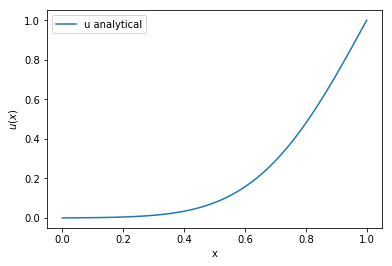

0.04
4e-05


In [2]:
# The exact solution at t1:
def u_exact(t,x, N = 1e4, dx = 0.1, L = 1):

    N = int(N)
    u_e = x/L
    for n in np.arange(1, N+1):
        lmb = n*np.pi/L
        A_n = 2*(np.pi*n*np.cos(np.pi*n)-np.sin(np.pi*n))/(np.pi*n)**2
        u_e += A_n * np.exp(-lmb**2*t)*np.sin(lmb*x)
        
    return u_e


x1 = FE_t1[:,1]
dx = x1[1]-x1[0]
dt = 0.4*dx**2
t = dt*1000

print(dt)

u_e1 = u_exact(t,x1, dx = dx, N = 5000)

plt.figure()
plt.plot(x1, u_e1, label = r'u analytical')
plt.xlabel('x')
plt.ylabel(r'$u(x)$')
plt.legend()
plt.savefig('u_anal_1000')
plt.show()

print(t)
print(dt)

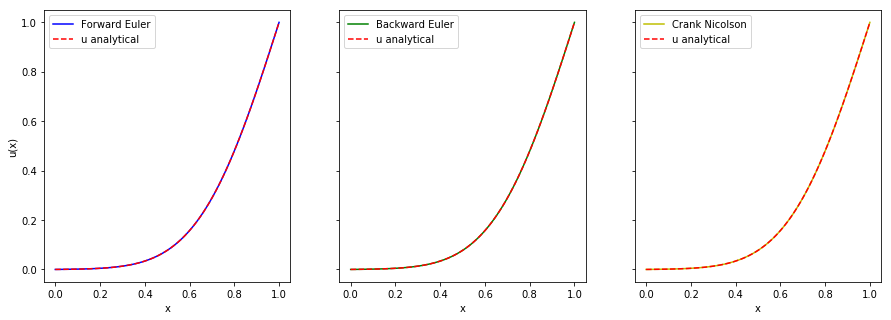

In [3]:
# Numerical solutions at t1, n = 1000 timesteps.
fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)

axs[0].plot(FE_t1[:,1],FE_t1[:,0],'b', label = 'Forward Euler')
axs[0].plot(x1,u_e1, 'r--',label = 'u analytical')
axs[0].legend()

axs[1].plot(BE_t1[:,1],BE_t1[:,0],'g', label = 'Backward Euler')
axs[1].plot(x1,u_e1, 'r--',label = 'u analytical')
axs[1].legend()

axs[2].plot(CN_t1[:,1],CN_t1[:,0], 'y', label = 'Crank Nicolson')
axs[2].plot(x1,u_e1, 'r--',label = 'u analytical')
axs[2].legend()

axs[0].set_ylabel('u(x)')
axs[0].set_xlabel('x')
axs[1].set_xlabel('x')
axs[2].set_xlabel('x')

plt.savefig('numerical_solution_1000')
plt.show()

/Users/phb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/phb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/phb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


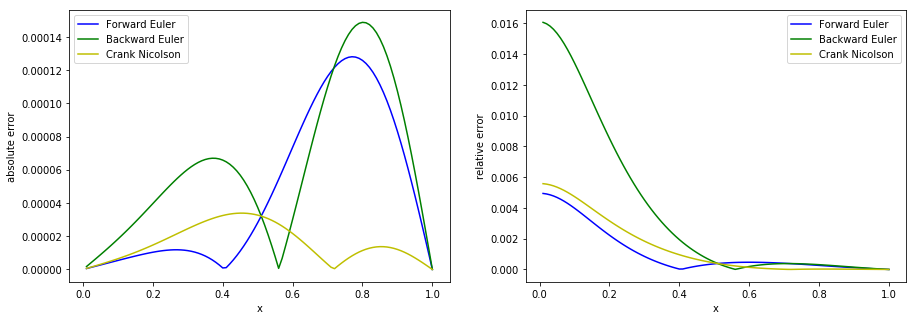

"\n#Relativ error plot:\nE_FE = np.abs((FE_t1[:,0]-u_e1)/u_e1)\nE_BE = np.abs((BE_t1[:,0]-u_e1)/u_e1)\nE_CN = np.abs((CN_t1[:,0]-u_e1)/u_e1)\n\n#E_FE = np.abs((FE_t1[:,0]-u_e1))\n#E_BE = np.abs((BE_t1[:,0]-u_e1))\n#E_CN = np.abs((CN_t1[:,0]-u_e1))\n\n\nplt.figure()\nplt.plot(x1[1:], E_FE[1:], 'b',  label = 'Forward Euler')\nplt.plot(x1[1:], E_BE[1:], 'g', label = 'Backward Euler')\nplt.plot(x1[1:], E_CN[1:],'y', label = 'Crank Nicolson')\nplt.xlabel('x')\nplt.ylabel('relativ error')\nplt.legend()\nplt.savefig('rel_error_1000')\nplt.show()\n"

In [5]:
#Relativ error plot:
rE_FE = np.abs((FE_t1[:,0]-u_e1)/u_e1)
rE_BE = np.abs((BE_t1[:,0]-u_e1)/u_e1)
rE_CN = np.abs((CN_t1[:,0]-u_e1)/u_e1)

E_FE = np.abs((FE_t1[:,0]-u_e1))
E_BE = np.abs((BE_t1[:,0]-u_e1))
E_CN = np.abs((CN_t1[:,0]-u_e1))

fig, axs = plt.subplots(1, 2, figsize=(15,5), sharey=False)
axs[0].plot(x1[1:], E_FE[1:], 'b',label = 'Forward Euler')
axs[0].plot(x1[1:], E_BE[1:], 'g',label = 'Backward Euler')
axs[0].plot(x1[1:], E_CN[1:], 'y',label = 'Crank Nicolson')
axs[0].set_xlabel('x')
axs[0].set_ylabel('absolute error')
axs[0].legend(loc = 'best')

axs[1].plot(x1[1:], rE_FE[1:], 'b',label = 'Forward Euler')
axs[1].plot(x1[1:], rE_BE[1:], 'g',label = 'Backward Euler')
axs[1].plot(x1[1:], rE_CN[1:], 'y',label = 'Crank Nicolson')
axs[1].set_xlabel('x')
axs[1].set_ylabel('relative error')
axs[1].legend(loc = 1)

plt.savefig('errors_0,01_1000')
plt.show()

"""
#Relativ error plot:
E_FE = np.abs((FE_t1[:,0]-u_e1)/u_e1)
E_BE = np.abs((BE_t1[:,0]-u_e1)/u_e1)
E_CN = np.abs((CN_t1[:,0]-u_e1)/u_e1)

#E_FE = np.abs((FE_t1[:,0]-u_e1))
#E_BE = np.abs((BE_t1[:,0]-u_e1))
#E_CN = np.abs((CN_t1[:,0]-u_e1))


plt.figure()
plt.plot(x1[1:], E_FE[1:], 'b',  label = 'Forward Euler')
plt.plot(x1[1:], E_BE[1:], 'g', label = 'Backward Euler')
plt.plot(x1[1:], E_CN[1:],'y', label = 'Crank Nicolson')
plt.xlabel('x')
plt.ylabel('relativ error')
plt.legend()
plt.savefig('rel_error_1000')
plt.show()
"""

In [6]:
# The maximum relativ error at t1:
# The maximum error at t1:
E_FE_max1 = np.max(E_FE[1:])
E_BE_max1 = np.max(E_BE[1:])
E_CN_max1 = np.max(E_CN[1:])

rE_FE_max1 = np.max(rE_FE[1:])
rE_BE_max1 = np.max(rE_BE[1:])
rE_CN_max1 = np.max(rE_CN[1:])

print('Max absolute error:')
print('Forward Euler:  ', round(E_FE_max1,10) )
print('Backward Euler: ', round(E_BE_max1,10) )
print('Crank Nicolson: ', round(E_CN_max1,10) )
print('')
print('Max relative error:')
print('Forward Euler:  ', round(rE_FE_max1,10) )
print('Backward Euler: ', round(rE_BE_max1,10) )
print('Crank Nicolson: ', round(rE_CN_max1,10) )

Max absolute error:
Forward Euler:   0.0001280475
Backward Euler:  0.000148752
Crank Nicolson:  3.38999e-05

Max relative error:
Forward Euler:   0.004939592
Backward Euler:  0.0160592108
Crank Nicolson:  0.0055752433


## N = 8000 timesteps. "Close to the steady state"


In [12]:
# Import the Data at n = 70 time steps. 
import numpy as np
import matplotlib.pyplot as plt

FE_t2 = np.loadtxt('0,01_8000FE.dat') # Forward euler
BE_t2 = np.loadtxt('0,01_8000BE.dat') # Backward Euler
CN_t2 = np.loadtxt('0,01_8000CN.dat') # Crank nickolson

0.32
4e-05


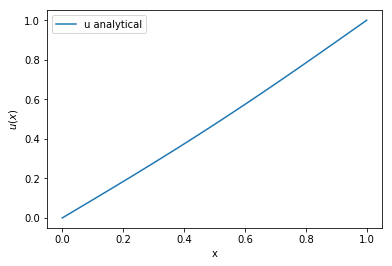

In [13]:
x2 = FE_t2[:,1]
dx2 = x2[1]-x2[0]
dt2 = 0.4*dx**2
t = dt2*8000
print(t)
print(dt)

u_e2 = u_exact(t,x1, dx = dx, N = 5000)

plt.figure()
plt.plot(x2, u_e2, label = r'u analytical')
plt.xlabel('x')
plt.ylabel(r'$u(x)$')
plt.legend()
plt.savefig('u_anal_8000')
plt.show()

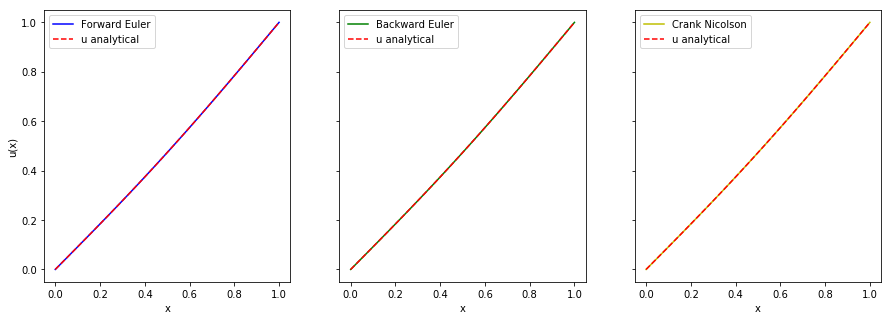

In [14]:
# Numerical solutions at t1, n = 20 timesteps.
fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)
axs[0].plot(FE_t2[:,1],FE_t2[:,0],'b', label = 'Forward Euler')
axs[0].plot(x2,u_e2, 'r--',label = 'u analytical')
axs[0].legend()

axs[1].plot(BE_t2[:,1],BE_t2[:,0],'g', label = 'Backward Euler')
axs[1].plot(x2,u_e2, 'r--',label = 'u analytical')
axs[1].legend()

axs[2].plot(CN_t2[:,1],CN_t2[:,0],'y', label = 'Crank Nicolson')
axs[2].plot(x2,u_e2, 'r--',label = 'u analytical')
axs[2].legend()

axs[0].set_ylabel('u(x)')
axs[0].set_xlabel('x')
axs[1].set_xlabel('x')
axs[2].set_xlabel('x')

plt.savefig('numerical_solution_8000')
plt.show()

/Users/phb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/phb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/phb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


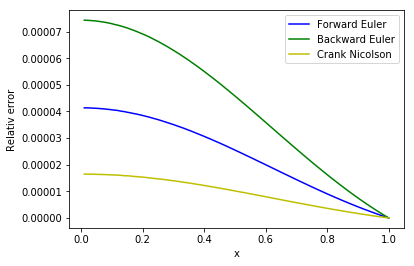

In [15]:
#Relativ error plot:
E_FE2 = np.abs((FE_t2[:,0]-u_e2)/u_e2)
E_BE2 = np.abs((BE_t2[:,0]-u_e2)/u_e2)
E_CN2 = np.abs((CN_t2[:,0]-u_e2)/u_e2)

#E_FE2 = np.abs((FE_t2[:,0]-u_e2))
#E_BE2 = np.abs((BE_t2[:,0]-u_e2))
#E_CN2 = np.abs((CN_t2[:,0]-u_e2))



plt.figure()
plt.plot(x2[1:], E_FE2[1:], 'b',label = 'Forward Euler')
plt.plot(x2[1:], E_BE2[1:], 'g',label = 'Backward Euler')
plt.plot(x2[1:], E_CN2[1:], 'y',label = 'Crank Nicolson')
plt.xlabel('x')
plt.ylabel('Relativ error')
plt.legend()
plt.savefig('rel_error_8000')
plt.show()

/Users/phb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/phb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/phb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


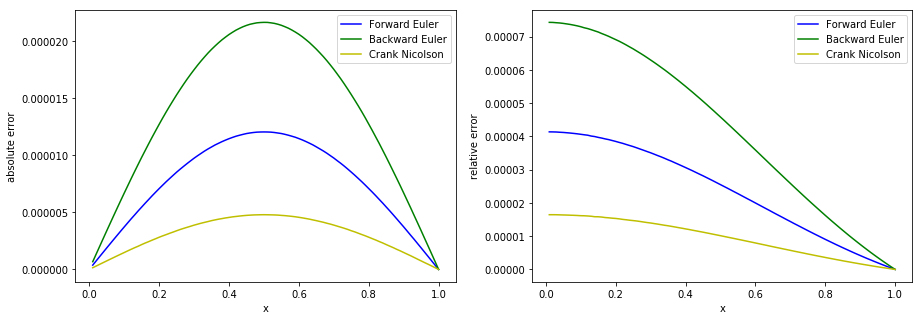

Max absolute error:
Forward Euler:   1.20595e-05
Backward Euler:  2.16705e-05
Crank Nicolson:  4.8005e-06

Max relative error:
Forward Euler:   4.13667e-05
Backward Euler:  7.42917e-05
Crank Nicolson:  1.64581e-05


In [16]:
#Relativ and absolute error plot:
rE_FE2 = np.abs((FE_t2[:,0]-u_e2)/u_e2)
rE_BE2 = np.abs((BE_t2[:,0]-u_e2)/u_e2)
rE_CN2 = np.abs((CN_t2[:,0]-u_e2)/u_e2)

# Absolute error
E_FE2 = np.abs((FE_t2[:,0]-u_e2))
E_BE2 = np.abs((BE_t2[:,0]-u_e2))
E_CN2 = np.abs((CN_t2[:,0]-u_e2))


fig, axs = plt.subplots(1, 2, figsize=(15,5), sharey=False)
axs[0].plot(x2[1:], E_FE2[1:], 'b',label = 'Forward Euler')
axs[0].plot(x2[1:], E_BE2[1:], 'g',label = 'Backward Euler')
axs[0].plot(x2[1:], E_CN2[1:], 'y',label = 'Crank Nicolson')
axs[0].set_xlabel('x')
axs[0].set_ylabel('absolute error')
axs[0].legend(loc = 'best')

axs[1].plot(x2[1:], rE_FE2[1:], 'b',label = 'Forward Euler')
axs[1].plot(x2[1:], rE_BE2[1:], 'g',label = 'Backward Euler')
axs[1].plot(x2[1:], rE_CN2[1:], 'y',label = 'Crank Nicolson')
axs[1].set_xlabel('x')
axs[1].set_ylabel('relative error')
axs[1].legend(loc = 1)

plt.savefig('errors_0,01_8000')
plt.show()

# The maximum error at t1:
E_FE_max2 = np.max(E_FE2[1:])
E_BE_max2 = np.max(E_BE2[1:])
E_CN_max2 = np.max(E_CN2[1:])

rE_FE_max2 = np.max(rE_FE2[1:])
rE_BE_max2 = np.max(rE_BE2[1:])
rE_CN_max2 = np.max(rE_CN2[1:])

print('Max absolute error:')
print('Forward Euler:  ', round(E_FE_max2,10) )
print('Backward Euler: ', round(E_BE_max2,10) )
print('Crank Nicolson: ', round(E_CN_max2,10) )
print('')
print('Max relative error:')
print('Forward Euler:  ', round(rE_FE_max2,10) )
print('Backward Euler: ', round(rE_BE_max2,10) )
print('Crank Nicolson: ', round(rE_CN_max2,10) )

In [ ]:
# The maximum relativ error at t1:
E_FE_max2 = np.max(E_FE2[1:])
E_BE_max2 = np.max(E_BE2[1:])
E_CN_max2 = np.max(E_CN2[1:])

print('Forward Euler:  ', E_FE_max2 )
print('Backward Euler: ', E_BE_max2 )
print('Crank Nicolson: ', E_CN_max2 )